# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df = pd.read_csv("Frozen_Dessert_Production.csv")

In [3]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.962
1,1972-02-01,67.061
2,1972-03-01,74.235
3,1972-04-01,78.112
4,1972-05-01,84.764


In [ ]:
df = df.set_index("DATE")

In [12]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0+ KB


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [13]:
df.columns = ['Production']

<AxesSubplot:xlabel='DATE'>

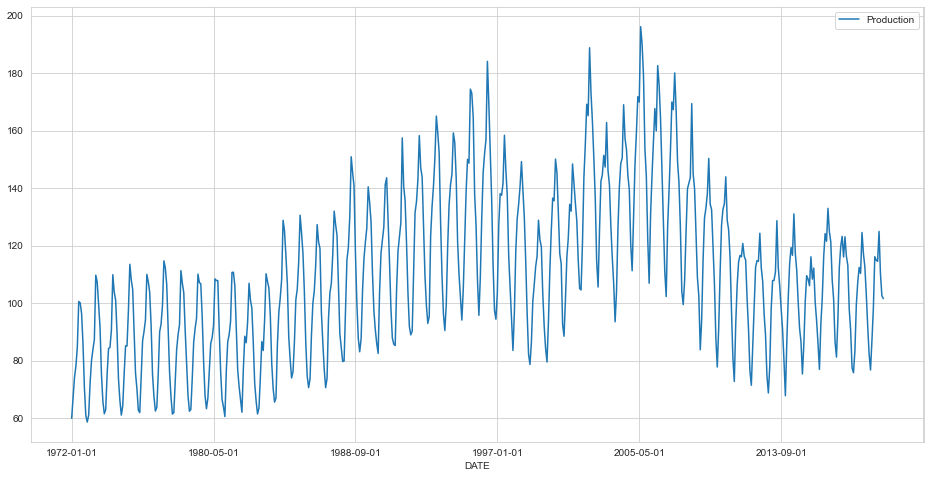

In [14]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [15]:
len(df)

573

In [16]:
test_point = np.round(len(df)*0.15)
test_point

86.0

In [17]:
test_ind = int(len(df) - test_point)
test_ind

487

In [18]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [19]:
test

,Production
DATE,
2012-08-01,107.643
2012-09-01,96.370
2012-10-01,88.886
2012-11-01,74.838
2012-12-01,68.769
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [20]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2012-03-01,112.487
2012-04-01,114.811
2012-05-01,114.566


### Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
length = 2
batch_size = 1
stride = 1 
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [28]:
len(train_scaled)

487

In [27]:
len(generator)

485

<AxesSubplot:xlabel='DATE'>

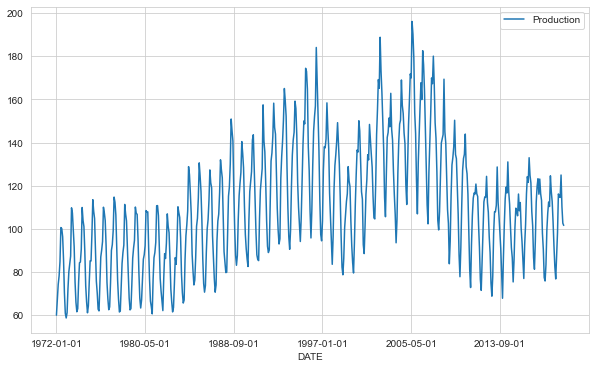

In [29]:
df.plot()

In [30]:
length = 60
batch_size = 1
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [31]:
X, y = generator[0]

In [32]:
len(generator)

427

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.
 0.01774221 0.09850931 0.15590133 0.18358944 0.20878908 0.37150354
 0.3542551  0.29817568 0.23973867 0.12104304 0.05289938 0.02087498
 0.03141355 0.12133246 0.18622481 0.18855185 0.23182893 0.37263651
 0.32891584 0.30809031 0.22409662 0.10933731 0.05452176 0.01749278
 0.04076752 0.12186114 0.19277469 0.19221257 0.28139264 0.39898221
 0.35985962 0.3357137  0.22874706 0.12405219 0.08404241 0.02969736
 0.02386668 0.11198795 0.20583228 0.22885832 0.258115   0.37353242
 0.35488703 0.32839226 0.24418041 0.11957773 0.06451857 0.02780228]
Predict this y: 
[[0.0371497]]


## Modelling & Model Performance

### Import related libraries

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [38]:
model = Sequential()
model.add(SimpleRNN(units = 80, activation = "tanh", input_shape=(length, 1)))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mse')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 80)                6560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
427/427 [==============================] - 9s 18ms/step - loss: 0.0157
Epoch 2/5
427/427 [==============================] - 8s 18ms/step - loss: 0.0039
Epoch 3/5
427/427 [==============================] - 10s 24ms/step - loss: 0.0025
Epoch 4/5
427/427 [==============================] - 10s 23ms/step - loss: 0.0024 0s - loss: 0 - ETA: 0s - los
Epoch 5/5
427/427 [==============================] - 11s 26ms/step - loss: 0.0024


<AxesSubplot:>

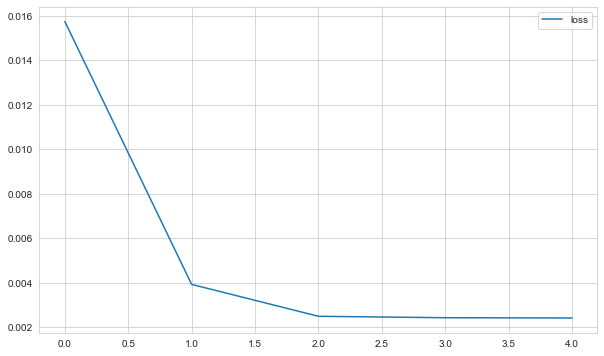

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [42]:
first_eval_batch = train_scaled[-length:]

In [43]:
first_eval_batch.shape

(60, 1)

In [45]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [46]:
first_eval_batch.shape

(1, 60, 1)

In [47]:
model.predict(first_eval_batch)

array([[0.37085605]], dtype=float32)

In [49]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

In [51]:
current_batch.shape

(1, 60, 1)

In [52]:
np.append(current_batch[:,1:,:], [[[0.37085605]]], axis = 1)

array([[[0.60582894],
        [0.49204408],
        [0.32987647],
        [0.2969518 ],
        [0.35876955],
        [0.48110555],
        [0.59006762],
        [0.60473814],
        [0.61824732],
        [0.80533386],
        [0.62801433],
        [0.58998181],
        [0.47530395],
        [0.36576521],
        [0.3184129 ],
        [0.18278007],
        [0.25838552],
        [0.41127697],
        [0.51611292],
        [0.54115039],
        [0.57690677],
        [0.66681259],
        [0.55138499],
        [0.53718642],
        [0.4420215 ],
        [0.34988681],
        [0.21230072],
        [0.13914302],
        [0.23728292],
        [0.37697716],
        [0.49767551],
        [0.53803288],
        [0.55192821],
        [0.62024348],
        [0.51047058],
        [0.48647082],
        [0.41747634],
        [0.28427817],
        [0.16309115],
        [0.10268271],
        [0.24689286],
        [0.3454618 ],
        [0.40423986],
        [0.42151084],
        [0.41797011],
        [0

In [53]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [54]:
predictions_scaled

[array([0.37085605], dtype=float32),
 array([0.30108336], dtype=float32),
 array([0.23371542], dtype=float32),
 array([0.16723183], dtype=float32),
 array([0.16139382], dtype=float32),
 array([0.22981656], dtype=float32),
 array([0.299652], dtype=float32),
 array([0.3758369], dtype=float32),
 array([0.39513168], dtype=float32),
 array([0.4012222], dtype=float32),
 array([0.41110516], dtype=float32),
 array([0.34968543], dtype=float32),
 array([0.3261219], dtype=float32),
 array([0.26224753], dtype=float32),
 array([0.22039022], dtype=float32),
 array([0.17503726], dtype=float32),
 array([0.18094814], dtype=float32),
 array([0.23031619], dtype=float32),
 array([0.28667873], dtype=float32),
 array([0.34438792], dtype=float32),
 array([0.35859507], dtype=float32),
 array([0.35697508], dtype=float32),
 array([0.3574373], dtype=float32),
 array([0.30648914], dtype=float32),
 array([0.28611067], dtype=float32),
 array([0.23841037], dtype=float32),
 array([0.21352986], dtype=float32),
 array(

In [55]:
test_scaled

array([[0.35620545],
       [0.27422828],
       [0.2198076 ],
       [0.11764411],
       [0.07351475],
       [0.14149624],
       [0.2863296 ],
       [0.35795581],
       [0.35814561],
       [0.37998486],
       [0.50926561],
       [0.39057433],
       [0.34465461],
       [0.28747203],
       [0.23516459],
       [0.15569044],
       [0.06649001],
       [0.20170834],
       [0.31321197],
       [0.40080166],
       [0.44136265],
       [0.42156466],
       [0.52634606],
       [0.42622818],
       [0.38365722],
       [0.30511534],
       [0.23707931],
       [0.20297948],
       [0.12155208],
       [0.19574094],
       [0.30468338],
       [0.37028329],
       [0.36143183],
       [0.34467716],
       [0.41797884],
       [0.36154745],
       [0.38938173],
       [0.30315844],
       [0.25649698],
       [0.19782873],
       [0.13318726],
       [0.24834362],
       [0.3149827 ],
       [0.41828135],
       [0.4766849 ],
       [0.45728977],
       [0.54050318],
       [0.481

#### Inverse Transformations and Comparing

In [56]:
predictions = scaler.inverse_transform(predictions_scaled)

In [57]:
predictions

array([[109.65766132],
       [100.06294653],
       [ 90.79891821],
       [ 81.65650087],
       [ 80.85369379],
       [ 90.2627709 ],
       [ 99.86611657],
       [110.3425991 ],
       [112.99589797],
       [113.83342938],
       [115.1924733 ],
       [106.74640732],
       [103.50609386],
       [ 94.72248097],
       [ 88.96651806],
       [ 82.72985693],
       [ 83.54268419],
       [ 90.33147778],
       [ 98.08211041],
       [106.01792581],
       [107.97160704],
       [107.74883526],
       [107.81239886],
       [100.80631692],
       [ 98.00399398],
       [ 91.44453958],
       [ 88.02312313],
       [ 83.91320753],
       [ 85.29320163],
       [ 90.33211711],
       [ 96.12547845],
       [101.82369931],
       [102.94724234],
       [103.03978045],
       [101.36217673],
       [ 96.12657268],
       [ 93.95711536],
       [ 88.59291079],
       [ 86.75788982],
       [ 83.88512849],
       [ 85.30861713],
       [ 88.82286268],
       [ 92.860551  ],
       [ 97

In [58]:
test

,Production
DATE,
2012-08-01,107.643
2012-09-01,96.370
2012-10-01,88.886
2012-11-01,74.838
2012-12-01,68.769
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [68]:
test['RNN_Predictions'] = predictions

In [69]:
test

,Production,RNN_Predictions
DATE,,
2012-08-01,107.643,109.658
2012-09-01,96.370,100.063
2012-10-01,88.886,90.799
2012-11-01,74.838,81.657
2012-12-01,68.769,80.854
...,...,...
2019-05-01,114.561,84.106
2019-06-01,124.960,82.832
2019-07-01,110.263,81.308


<AxesSubplot:xlabel='DATE'>

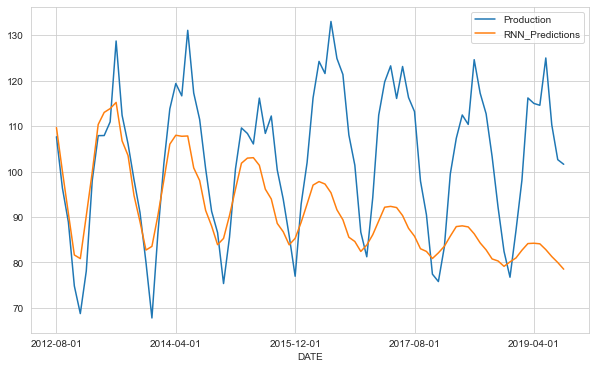

In [70]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [74]:
eval_metrics(test.Production, test.RNN_Predictions)

r2_score: -0.3286441369316562 
mae: 14.314714307961133 
mse: 326.631974000837 
rmse: 18.07296251312543


### with "relu" activation function

In [76]:
model = Sequential()
model.add(SimpleRNN(units = 80, activation = "relu", input_shape=(length, 1)))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mse')

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 80)                6560      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
427/427 [==============================] - 8s 17ms/step - loss: 0.0085
Epoch 2/5
427/427 [==============================] - 8s 18ms/step - loss: 0.0037: 0s - l
Epoch 3/5
427/427 [==============================] - 7s 17ms/step - loss: 0.0026: 0s - loss: 0.00
Epoch 4/5
427/427 [==============================] - 8s 18ms/step - loss: 0.0028
Epoch 5/5
427/427 [==============================] - 7s 17ms/step - loss: 0.0024


#### Evaluate on Test Data

In [87]:
first_eval_batch = train_scaled[-length:]

In [88]:
first_eval_batch.shape

(60, 1)

In [89]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [90]:
first_eval_batch.shape

(1, 60, 1)

In [91]:
model.predict(first_eval_batch)

array([[0.35526145]], dtype=float32)

In [92]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

In [93]:
np.append(current_batch[:,1:,:], [[[0.35526145]]], axis = 1)

array([[[0.60582894],
        [0.49204408],
        [0.32987647],
        [0.2969518 ],
        [0.35876955],
        [0.48110555],
        [0.59006762],
        [0.60473814],
        [0.61824732],
        [0.80533386],
        [0.62801433],
        [0.58998181],
        [0.47530395],
        [0.36576521],
        [0.3184129 ],
        [0.18278007],
        [0.25838552],
        [0.41127697],
        [0.51611292],
        [0.54115039],
        [0.57690677],
        [0.66681259],
        [0.55138499],
        [0.53718642],
        [0.4420215 ],
        [0.34988681],
        [0.21230072],
        [0.13914302],
        [0.23728292],
        [0.37697716],
        [0.49767551],
        [0.53803288],
        [0.55192821],
        [0.62024348],
        [0.51047058],
        [0.48647082],
        [0.41747634],
        [0.28427817],
        [0.16309115],
        [0.10268271],
        [0.24689286],
        [0.3454618 ],
        [0.40423986],
        [0.42151084],
        [0.41797011],
        [0

In [94]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [95]:
predictions_scaled

[array([0.35526145], dtype=float32),
 array([0.28203636], dtype=float32),
 array([0.21139072], dtype=float32),
 array([0.1683154], dtype=float32),
 array([0.1611838], dtype=float32),
 array([0.22965944], dtype=float32),
 array([0.32595998], dtype=float32),
 array([0.38091278], dtype=float32),
 array([0.41221073], dtype=float32),
 array([0.47265732], dtype=float32),
 array([0.52461934], dtype=float32),
 array([0.49697787], dtype=float32),
 array([0.44846958], dtype=float32),
 array([0.3773605], dtype=float32),
 array([0.3018212], dtype=float32),
 array([0.24479894], dtype=float32),
 array([0.22051439], dtype=float32),
 array([0.28113252], dtype=float32),
 array([0.3919174], dtype=float32),
 array([0.46230012], dtype=float32),
 array([0.5024946], dtype=float32),
 array([0.54812354], dtype=float32),
 array([0.6262595], dtype=float32),
 array([0.5946229], dtype=float32),
 array([0.5464328], dtype=float32),
 array([0.46591717], dtype=float32),
 array([0.3812073], dtype=float32),
 array([0.3

In [96]:
test_scaled

array([[0.35620545],
       [0.27422828],
       [0.2198076 ],
       [0.11764411],
       [0.07351475],
       [0.14149624],
       [0.2863296 ],
       [0.35795581],
       [0.35814561],
       [0.37998486],
       [0.50926561],
       [0.39057433],
       [0.34465461],
       [0.28747203],
       [0.23516459],
       [0.15569044],
       [0.06649001],
       [0.20170834],
       [0.31321197],
       [0.40080166],
       [0.44136265],
       [0.42156466],
       [0.52634606],
       [0.42622818],
       [0.38365722],
       [0.30511534],
       [0.23707931],
       [0.20297948],
       [0.12155208],
       [0.19574094],
       [0.30468338],
       [0.37028329],
       [0.36143183],
       [0.34467716],
       [0.41797884],
       [0.36154745],
       [0.38938173],
       [0.30315844],
       [0.25649698],
       [0.19782873],
       [0.13318726],
       [0.24834362],
       [0.3149827 ],
       [0.41828135],
       [0.4766849 ],
       [0.45728977],
       [0.54050318],
       [0.481

#### Inverse Transformations and Comparing

In [97]:
predictions = scaler.inverse_transform(predictions_scaled)

In [99]:
predictions

array([[107.51318683],
       [ 97.44372037],
       [ 87.72896217],
       [ 81.80550649],
       [ 80.82481354],
       [ 90.24116501],
       [103.48382816],
       [111.04060204],
       [115.34450548],
       [123.65675183],
       [130.80225158],
       [127.00116453],
       [120.33060087],
       [110.55211309],
       [100.1644106 ],
       [ 92.32305742],
       [ 88.98359335],
       [ 97.31942914],
       [112.55389118],
       [122.23249272],
       [127.75978854],
       [134.03440546],
       [144.77918705],
       [140.42871539],
       [133.80190447],
       [122.72988713],
       [111.08110079],
       [101.58680502],
       [ 96.64737211],
       [103.8813896 ],
       [120.16245444],
       [132.03985255],
       [137.43498035],
       [143.48581732],
       [156.11740925],
       [152.86712479],
       [146.26772286],
       [135.0229076 ],
       [122.35329635],
       [111.0738715 ],
       [104.66221375],
       [110.33913609],
       [126.88341818],
       [141

In [101]:
test['Relu_Predictions'] = predictions

In [102]:
test

,Production,RNN_Predictions,Relu_Predictions
DATE,,,
2012-08-01,107.643,109.658,107.513
2012-09-01,96.370,100.063,97.444
2012-10-01,88.886,90.799,87.729
2012-11-01,74.838,81.657,81.806
2012-12-01,68.769,80.854,80.825
...,...,...,...
2019-05-01,114.561,84.106,179.869
2019-06-01,124.960,82.832,189.256
2019-07-01,110.263,81.308,194.856


<AxesSubplot:xlabel='DATE'>

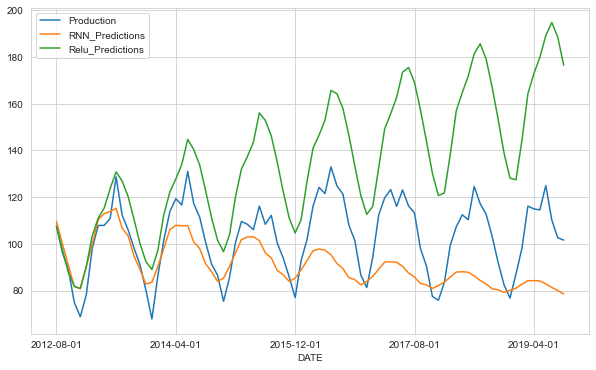

In [104]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [105]:
eval_metrics(test.Production, test.Relu_Predictions)

r2_score: -5.150569056183552 
mae: 32.90855300730493 
mse: 1512.047098397001 
rmse: 38.88504980576727
